Epoch 1/10
4/4 [==============================] - 1s 3ms/step - loss: 0.6897 - accuracy: 0.5300
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5600
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5600
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5600
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.5700
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5700
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5900
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6100
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.6000
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.5800


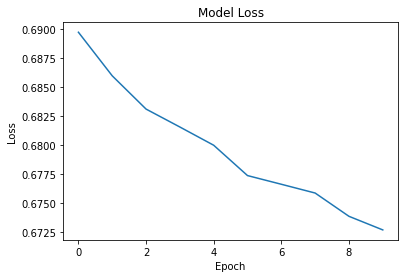

Loss function of the loaded model: <function binary_crossentropy at 0x0000018789E70310>


C:\Users\adelpasand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

# Generate synthetic data
X_train = np.random.rand(100, 10)
y_train = np.random.randint(2, size=(100,))

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Save the model to disk
model.save('my_model.h5')

# Load the model from disk
loaded_model = load_model('my_model.h5')

# Print the loss function of the loaded model
print("Loss function of the loaded model:", loaded_model.loss)


In [2]:
# Load the model from disk
loaded_model = load_model('my_model.h5')

# Print the loss function of the loaded model
print("Loss function of the loaded model:", loaded_model.loss)

Loss function of the loaded model: <function binary_crossentropy at 0x0000018789E70310>


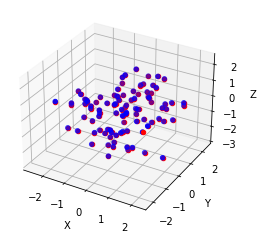

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)
z = np.random.normal(0, 1, 100)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all points
ax.scatter(x, y, z, c='blue', label='All points')

# Find unique z values
unique_z = np.unique(z)

# Plot points with equal z values in a different color
for val in unique_z:
    indices = np.where(z == val)[0]
    ax.scatter(x[indices], y[indices], z[indices], c='red', label=f'z={val}')

# Label axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add legend

plt.show()


In [4]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random scattered points
np.random.seed(0)
points = np.random.rand(30, 3)  # 30 points in 3D space

# Compute convex hull
hull = ConvexHull(points)

# Define a plane (for example: z = 0.5)
normal = np.array([0, 0, 1])  # normal vector of the plane
d = 0.5  # distance from origin to the plane
# Generate points on the plane
plane_points = np.array([[x, y, d] for x in np.linspace(0, 1, 10) for y in np.linspace(0, 1, 10)])

# Find intersection points
intersection_points = []
for simplex in hull.simplices:
    for point in plane_points:
        if np.abs(np.dot(hull.equations[simplex, :3], point) + hull.equations[simplex, 3]) < 1e-6:
            intersection_points.append(point)

intersection_points = np.array(intersection_points)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scattered points
ax.plot(points[:, 0], points[:, 1], points[:, 2], 'ko', label='Scattered Points')

# Plot convex hull
for simplex in hull.simplices:
    simplex = np.append(simplex, simplex[0])  # close the simplex
    ax.plot(points[simplex, 0], points[simplex, 1], points[simplex, 2], 'r-')

# Plot intersection points
ax.plot(intersection_points[:, 0], intersection_points[:, 1], intersection_points[:, 2], 'bo', label='Intersection Points')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()